In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

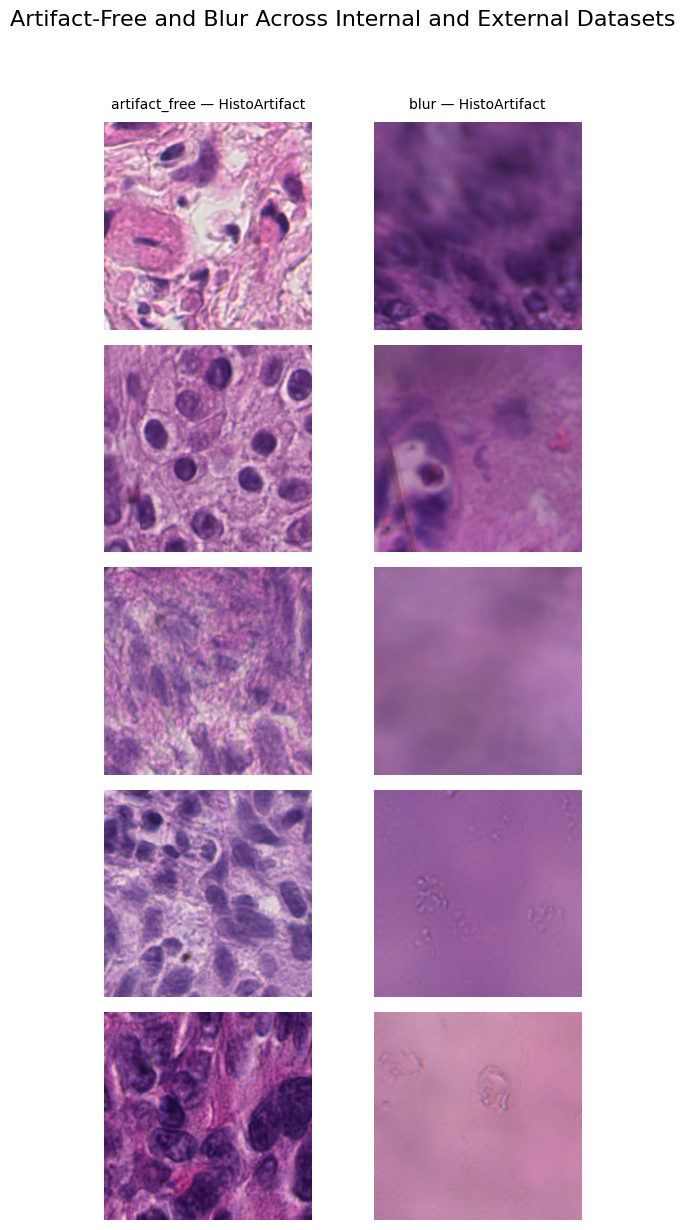

In [ ]:
basepath  = './data/'

base_dirs = [
    basepath + 'D40x/training/'
]

headers   = ['HistoArtifact'] 
classes   = ['artifact_free', 'blur']

n_images  = 5


image_columns = []  
for cls in classes:
    for base, name in zip(base_dirs, headers):
        class_dir  = os.path.join(base, cls)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
        selected   = random.sample(all_images, min(n_images, len(all_images)))

        image_columns.append((f"{cls} — {name}", selected))

fig, axs = plt.subplots(n_images, len(image_columns), figsize=(len(image_columns)*3, n_images*2.5))
fig.suptitle("Artifact-Free and Blur Across Internal and External Datasets", fontsize=16)

for col, (label, img_paths) in enumerate(image_columns):
    for row in range(n_images):

        ax = axs[row, col]

        if row < len(img_paths):
            img = Image.open(img_paths[row])
            ax.imshow(img)

        ax.axis('off')

        if row == 0:
            ax.set_title(label, fontsize=10, pad=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
